In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [33]:
path = os.path.join(os.getcwd(), '../raw_data')

data_prep = pd.read_csv(os.path.join(path, 'x_train_preprocessed.csv'))
data_prep

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,summary,positives,negatives,advice_to_mgmt,review,summary_length,postives_length,negatives_length,advice_length,...,subjectivity_summary,polarity_summary,subjectivity_positives,polarity_positives,subjectivity_negatives,polarity_negatives,subjectivity_advice_to_mgmt,polarity_advice_to_mgmt,subjectivity_review,polarity_review
0,0,good job considering retail,apple good company period pay average working ...,job movement lateral extremely difficult get p...,NaN,good job considering retail apple good company...,31,118,127,0,...,0.600000,0.700000,0.666667,0.516667,1.000000,-0.500000,0.000000,0.000000,0.720000,0.350000
1,1,warning potential new hire,good pay smart coworkers good insurance,hr protect company employee careful restricted...,many employment contract state restricted stoc...,warning potential new hire good pay smart cowo...,31,41,132,1509,...,0.727273,0.068182,0.614286,0.538095,0.625000,0.075000,0.499852,0.120897,0.536005,0.157255
2,2,demanding job get work brilliant mind industry,intelligent co worker encouraged innovate good...,promote work life balance word employee get re...,employee get burned soon life outside work goi...,demanding job get work brilliant mind industry...,87,89,164,150,...,1.000000,0.900000,0.833333,0.783333,0.000000,0.000000,0.368750,-0.156250,0.706250,0.489583
3,3,deliver get fired,pay competitive look good resume move around i...,work life balance hostile environment reward b...,people disposable,deliver get fired pay competitive look good re...,21,189,306,26,...,0.000000,0.000000,0.460714,0.403571,0.492063,0.031746,0.000000,0.000000,0.474150,0.244218
4,4,good salary perk benefit,good salary perk benefit,hectic schedule u ill learning cutting technology,NaN,good salary perk benefit good salary perk bene...,34,34,57,0,...,0.600000,0.700000,0.600000,0.700000,0.950000,-0.550000,0.000000,0.000000,0.775000,0.075000
5,5,happy year working amazon,great people challenging project fast paced en...,hard get often turn away good people left clea...,great hiring need get better,happy year working amazon great people challen...,45,59,108,50,...,1.000000,0.800000,0.783333,0.500000,0.381250,0.127083,0.625000,0.650000,0.612500,0.410833
6,6,one hopefully soon remembered,great experience advancement understanding uti...,always enough time meet deadline,keep positive attitude try cooperate much poss...,one hopefully soon remembered great experience...,35,121,40,80,...,0.000000,0.000000,0.575000,0.450000,0.500000,0.000000,0.772727,0.113636,0.639091,0.225455
7,7,hardwork peanut,fellow team member great work,limited opportunity move within company,try treat team member like robot like human,hardwork peanut fellow team member great work ...,20,44,50,67,...,0.000000,0.000000,0.750000,0.800000,0.142857,-0.071429,0.100000,0.000000,0.330952,0.242857
8,8,software developer,really nothing share v,everything terrible v,NaN,software developer really nothing share v ever...,18,26,28,0,...,0.000000,0.000000,0.200000,0.200000,1.000000,-1.000000,0.000000,0.000000,0.600000,-0.400000
9,9,everyone high stress company growing pain,world class benefit smart coworkers food galor...,work life balance unrealistic recruiting expec...,stop micromanaging sourcers current recruiting...,everyone high stress company growing pain worl...,56,60,235,238,...,0.540000,0.160000,0.421429,0.257143,0.644444,-0.300000,0.594444,-0.133333,0.566614,-0.069524


In [3]:
data_prep.shape

(36970, 51)

In [4]:
data_prep.positives.isnull().sum()

1

In [5]:
# only consider positive reviews and drop nan values

positives = data_prep.positives.dropna()
positives.shape

(36969,)

In [6]:
positives

0        apple good company period pay average working ...
1                  good pay smart coworkers good insurance
2        intelligent co worker encouraged innovate good...
3        pay competitive look good resume move around i...
4                                 good salary perk benefit
5        great people challenging project fast paced en...
6        great experience advancement understanding uti...
7                            fellow team member great work
8                                   really nothing share v
9        world class benefit smart coworkers food galor...
10                    people technology impact scale money
11                            team work international echo
12                             dynamic fast moving company
13       good salary lot opportunity work different tec...
14       intelligent staff opportunity career developme...
15       easy straight forward job computer system easy...
16                                  great brand add resu

In [7]:
# only consider positive reviews and drop nan values

negatives = data_prep.negatives.dropna()
negatives.shape

(36961,)

In [8]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])

In [9]:
vectorizer = TfidfVectorizer(max_df=0.8, ngram_range=(3,3)).fit(negatives) # words that appear most (top 20%) left out

data_vectorized = vectorizer.transform(negatives)

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

print_topics(lda_model, vectorizer)

Topic 0:
[('work life balance', 141.46510315327916), ('poor work life', 22.44484759450345), ('nothing bad say', 15.996833876844281), ('long working hour', 14.718087844604646), ('work long hour', 12.084299653694448), ('long hour lot', 12.032111865336736), ('life balance great', 11.916176632381186), ('life balance challenging', 11.360200454137914), ('hour short break', 11.193833263916094), ('long hour short', 10.348850031433265)]
Topic 1:
[('work life balance', 124.1475472721468), ('life balance hard', 14.571811510623984), ('life balance could', 11.932843521751682), ('good work life', 11.764543151582187), ('bad work life', 11.702468527394231), ('long hour foot', 10.661728127324173), ('nothing come mind', 10.026680876986077), ('hard get promoted', 9.594239755399672), ('work work life', 9.415871090478415), ('balance could better', 8.733954524726803)]
Topic 2:
[('work life balance', 134.17727825819995), ('life balance good', 18.950965665355714), ('none none none', 17.3288182495391), ('great

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/theresasporn/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/theresasporn/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [11]:
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only     the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if   is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [12]:
data_nouns = pd.DataFrame(negatives.apply(nouns_adj))
data_nouns.shape

(36961, 1)

In [13]:
negatives.head()

0    job movement lateral extremely difficult get p...
1    hr protect company employee careful restricted...
2    promote work life balance word employee get re...
3    work life balance hostile environment reward b...
4    hectic schedule u ill learning cutting technology
Name: negatives, dtype: object

In [14]:
vectorizer = TfidfVectorizer(max_df=0.1).fit(data_nouns.negatives) # words that appear most (top 20%) left out

data_vectorized = vectorizer.transform(data_nouns.negatives)

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

print_topics(lda_model, vectorizer)

Topic 0:
[('con', 727.8632157216681), ('none', 378.57569706578386), ('good', 321.0488238848941), ('hard', 290.9335485144697), ('place', 283.2278256506801), ('big', 280.36456906344944), ('thing', 274.3792177557326), ('lot', 272.4209268283494), ('great', 264.71889938452824), ('many', 222.96758615624336)]
Topic 1:
[('day', 296.27384014541366), ('break', 218.9469006134589), ('manager', 215.36724936596417), ('job', 207.91853289349757), ('team', 198.69870261586814), ('lot', 163.09447672283375), ('hard', 145.62243318172455), ('employee', 144.01944671875236), ('short', 143.38581909052672), ('environment', 135.74165859961627)]
Topic 2:
[('balance', 823.7096867730969), ('employee', 432.34452680196165), ('high', 411.3950989996365), ('much', 409.50891889836805), ('pay', 409.12073647334586), ('growth', 392.3488147689735), ('manager', 380.640393430639), ('retail', 373.28355564382895), ('nothing', 359.1148899409829), ('career', 335.39338822537195)]


In [15]:
tokenized = []
for sentence in negatives:
    tokenized.append(word_tokenize(sentence))
    
tokenized

[['job',
  'movement',
  'lateral',
  'extremely',
  'difficult',
  'get',
  'promoted',
  'competing',
  'coworkers',
  'store'],
 ['hr',
  'protect',
  'company',
  'employee',
  'careful',
  'restricted',
  'stock',
  'unit',
  'awarded',
  'exact',
  'number'],
 ['promote',
  'work',
  'life',
  'balance',
  'word',
  'employee',
  'get',
  'recognized',
  'hand',
  'meeting',
  'worked',
  'hour',
  'week',
  'never',
  'took',
  'time'],
 ['work',
  'life',
  'balance',
  'hostile',
  'environment',
  'reward',
  'bully',
  'limited',
  'development',
  'advancement',
  'option',
  'older',
  'employee',
  'manager',
  'check',
  'balance',
  'get',
  'terminated',
  'made',
  'reason',
  'employment',
  'likely',
  'rsus',
  'vest',
  'hr',
  'support',
  'manager',
  'employee'],
 ['hectic', 'schedule', 'u', 'ill', 'learning', 'cutting', 'technology'],
 ['hard',
  'get',
  'often',
  'turn',
  'away',
  'good',
  'people',
  'left',
  'clear',
  'idea',
  'make'],
 ['always', '

In [16]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [17]:
# create id2word
id2word = corpora.Dictionary(tokenized)

# Create Corpus
texts = tokenized

# Creat Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [18]:
ldamallet = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=2, id2word=id2word, iterations=100)

In [19]:
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.46881025480184463


In [20]:
import pprint as pp
#pp = #+(indent=4)

In [21]:
pp.pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('work', 0.0428919),
   ('time', 0.01726504),
   ('hour', 0.016161887),
   ('life', 0.0130452635),
   ('balance', 0.010657415),
   ('get', 0.00986455),
   ('long', 0.009009471),
   ('day', 0.00888757),
   ('employee', 0.0083921235),
   ('working', 0.008109872)]),
 (1,
  [('company', 0.01584306),
   ('people', 0.013523035),
   ('management', 0.011811708),
   ('get', 0.010715064),
   ('team', 0.01049377),
   ('manager', 0.009679018),
   ('lot', 0.00819813),
   ('many', 0.0065207924),
   ('culture', 0.0058853384),
   ('employee', 0.005782363)])]


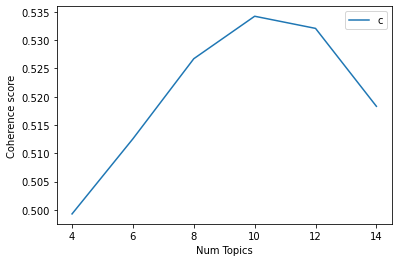

In [22]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, alpha=.91)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


# Running the above function. Can take a long time to run!
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=4, limit=16, step=2)


# Show graph of LDA coherence scores
# ATTEN: parameters here have to match those of you function to display properly!
limit = 16
start = 4
step = 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [23]:
max_y = max(coherence_values)  # Find the maximum y value
max_x = coherence_values.index(max(coherence_values))  # Find the x value corresponding to the maximum y value
#xmax = x[numpy.argmax(y)]

#optimal_model = model_list[coherence_values.index(max(coherence_values))]
optimal_model = coherence_values.index(max(coherence_values))
#optimal_model
#model_topics = optimal_model.show_topics(formatted=False)
#pp.pprint(optimal_model.print_topics(num_words=10))

In [24]:
optimal_model = coherence_values.index(max(coherence_values))
optimal_model

3

In [25]:
import pyLDAvis
import pyLDAvis.gensim

In [26]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary=optimal_model.id2word)
vis

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: 'int' object has no attribute 'id2word'

In [27]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    id2word = corpora.Dictionary(texts)
    texts = tokenized
    corpus = [id2word.doc2bow(text) for text in texts]
    ldamallet = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=2, id2word=id2word, iterations=100)
    coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_ldamallet = coherence_model_ldamallet.get_coherence()
    #pp.pprint(ldamallet.show_topics(formatted=False))
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, alpha=.91)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
compute_coherence_values(id2word, corpus, tokenized, 14, 2, 1)

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([<gensim.models.ldamodel.LdaModel at 0x12b4eac50>,
 [0.5020915230664604,
  0.4931745402086445,
  0.5157428229308869,
  0.5113690213692786,
  0.5139246579966846,
  0.5279560225961906,
  0.5380163112259491,
  0.5298985479557661,
  0.5360958619134113,
  0.5133597407582755,
  0.5275954223311884,
  0.5289781238942217])

In [29]:
def make_pyldavis(dictionary, corpus, texts, start, limit, step):
    dictionary = id2word
    model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=4, limit=16, step=2)
    model_list.index(x.index(max(coherence_values))) #change!
    max_y = max(coherence_values)
    max_x = coherence_values.index(max(coherence_values))  #change!
    optimal_model = model_list[coherence_values.index(max(coherence_values))]
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary=optimal_model.id2word)
    return vis

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
max_x

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3

In [32]:
make_pyldavis(id2word, corpus, texts, 4,16,2)

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: sequence.index(x): x not in sequence